<a href="https://colab.research.google.com/github/Melinnaaa/ADA-Informes/blob/main/Informe3_maxSubArray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Problema de optimización**

**Entrada:** Arreglo de números $[a_1, ..., a_n]$.

**Salida:** Sub-arreglo $[a_i,..,a_j]$, tal que la suma de los elementos es mayor o igual a cualquier otro sub-arreglo, es decir, $\sum\limits_{k=i}^j a_k \geq \sum\limits_{k=i'}^{j'} a_k$ , para cualquier par $(i',j')$, con $i' \leq j'\leq n$..

El tamaño del problema es indicado por la cantidad de datos ingresados en la entrada, por lo cual correspondería a **n**.

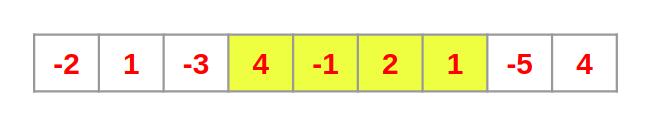

Desde el comienzo de la era tecnológica ha sido un tema a investigar el problema de optimización, uno de los pilares fundamentales al momento de programar y encontrar la mejor solución posible. 

En este informe hablaremos del sub-arreglo máximo: Implementado con el paradigma *Divide y vencerás*, este algoritmo puede ser implementado para resolver algunos problemas reales. Por ejemplo, se puede crear un modelo simplificado para la estimación de *máxima verosimilitud* de patrones en imágenes digitalizadas, o para obtener la epoca del año en donde una empresa tuvo la mejor cantidad de ventas, etc.

# **2. Max Subarray**

## 2.1 Código

El siguiente código muestra una implementación del algoritmo **Max Subarray**.

In [ ]:
import math
from termcolor import colored
import random

# Función obtiene el máximo subarreglo que cruza por el medio.
def maxMidSubArray(arr, mid, verbose):
  sum = 0
  maxLeft = -math.inf
  low = mid - 1  # Guarda la posición inicial del máximo subarreglo.

  # Se obtiene subArreglo mas grande de la izquierda.
  for i in range(mid - 1, -1, -1):
    sum = sum + arr[i]
    
    if (sum > maxLeft):
       maxLeft = sum
       low = i

  sum = 0
  maxRight = -math.inf
  high = mid # Guarda la posición final del máximo subarreglo.
  
  # Se obtiene el subarreglo maximo de la derecha.
  for i in range (mid, len(arr)):
    sum = sum + arr[i]
    if (sum > maxRight):
      maxRight = sum
      high = i 
  if (verbose == True):
    print("Suma izquierda:", maxLeft)
    print("Suma derecha:", maxRight)

  maxSum = maxLeft + maxRight

  # Si verbose es True, se muestran el subarreglo mayor que cruza por el medio.
  if (verbose == True):
    
    if (len (arr[low:high + 1]) > 1):
      print ("Maximo Subarreglo que pasa por el medio: ", colored(f"{str(arr[low: high-1])[1:-1]}","blue"), ",", colored(f"{str(arr[high-1:high + 1])[1:-1]}","blue"), "\n")
    
    else:
      print ("Máximo subarreglo que pasa por el medio: ", colored(f"{str(arr[low: high])[1:-1]}","blue"), "\n")

  return ((maxLeft + maxRight), low, high)

# Función que obtiene el máximo subarreglo de manera recursiva.
def maxSubArray(arr, low, high, verbose):
  n = len (arr)
  
  # Caso base.
  if (n == 1):
    return (arr[0], low, low)

  # Se obtiene la mitad.
  mid = n//2

  # Subarreglo Izquierdo y derecho.
  leftArr = arr[: mid]
  rightArr = arr[mid : ]

  # Si verbose es True se muestran los subarreglos.
  if (verbose == True):
        print("SubArreglo Izquierdo: ", leftArr)
        print("SubArreglo Derecho: ", rightArr, "\n")
  
  # Se obtiene la suma máxima del subarreglo izquierdo y el indice de comienzo y fin.
  maxLeft, lowLeft, highLeft = maxSubArray(leftArr, low, mid - 1, verbose)
  
  # Se obtiene la suma máxima del subarreglo derecho y el indice de comienzo y fin.
  maxRight, lowRight, highRight = maxSubArray(rightArr, mid, high, verbose)
  
  # Se obtiene la suma máxima del subarreglo que pasa por el centro.
  # y el indice de comienzo y fin.
  maxMid, lowMid, highMid = maxMidSubArray(arr, mid, verbose)
  
  # Se obtiene la máxima suma.
  maxSum = max (maxLeft, maxRight, maxMid)
  
  # Si el suma maxima es el subarreglo que pasa por el medio.
  if (maxSum == maxMid):
    if (verbose == True):
      print("El subarreglo máximo es el central:", arr[lowMid:highMid + 1])
    return maxSum, lowMid, highMid

  # Si el suma maxima es el subarreglo de la derecha.
  elif (maxSum == maxRight):
    if (verbose == True):
      print("El subarreglo máximo es el izquierdo:", arr[lowRight + (n - 1)//2 : highRight + n//2])
    # Se le suma n//2, ya que va desde la mitad hasta arriba.
    return maxSum, lowRight + (n - 1)//2, highRight + (n-1)//2

  # Si el suma maxima es el subarreglo de la izquierda.
  elif (maxSum == maxLeft):
    if (verbose == True):
      print("El subarreglo máximo es el izquierdo:", arr[lowLeft:highLeft + 1])
    return maxSum, lowLeft, highLeft
  

#a = random.sample(range(-100, 100), 6)
a = [-4,-5,-6,-1,100,-2]
print("Arreglo de entrada: ", a)
b, i, j = maxSubArray(a, 0, len(a) - 1, verbose = False)
print ("La suma maxima es: ", b)
print ("El arreglo comienza en la posición", i, "y termina en la posición", j)


Arreglo de entrada:  [-4, -5, -6, -1, 100, -2]
La suma maxima es:  100
El arreglo comienza en la posición 4 y termina en la posición 4


## 2.2. Descripción del algoritmo

### MaxSubArray

El algoritmo recibe como entrada una lista (o arreglo) ***array*** con una cantidad de **n** elementos, en donde tendrá que encontrar el *subarreglo* que tenga la suma máxima. El algoritmo se implementa de forma *recursiva*


1.   *Divide* el arreglo en dos subarreglos de largo n//2.

2.   Cada subarreglo se vuelve a dividir, hasta que se obtengan arreglos de largo *n = 1*.

3.   Se comienza a buscar el máximo subarreglo de cada mitad.

4. Se busca el máximo subarreglo que pase por el **medio o punto de división**, esto se realiza de manera lineal, no de manera recursiva.

4. Se comparán los tres subarreglos y se retorna el que contenga la máxima suma.


Si la variable `verbose` es `True` se muestra información para ver lo que ocurre paso a paso dentro de la función.






### Función *maxMidSubArray*

Esta función es la encargada de buscar el máximo subarreglo que pasa por ambas mitades.

La función recibe los siguientes datos de entrada:


*   *array*: El arreglo a ordenar.
*   *mid*: Posición central del arreglo.
*   *verbose*: Variable que muestra lo que ocurre dentro de la función.

Pasos que sigue la función.

1.   Se recorre desde la *mitad - 1* hasta el inicio (subarreglo izquierdo), y de la *mitad* al final (subarreglo derecho), para así obtener la suma máxima que se encuentra en cada mitad.

2.   Se suman ambas partes, para así obtener el subarreglo máximo que cruza el punto de división.

3.   Se retorna la suma del subarreglo, la posición inicial y final de este.



## 2.3. Ejemplo


En la siguiente imagen se considera el arreglo de entrada **[3, -2, 5, -1]**.

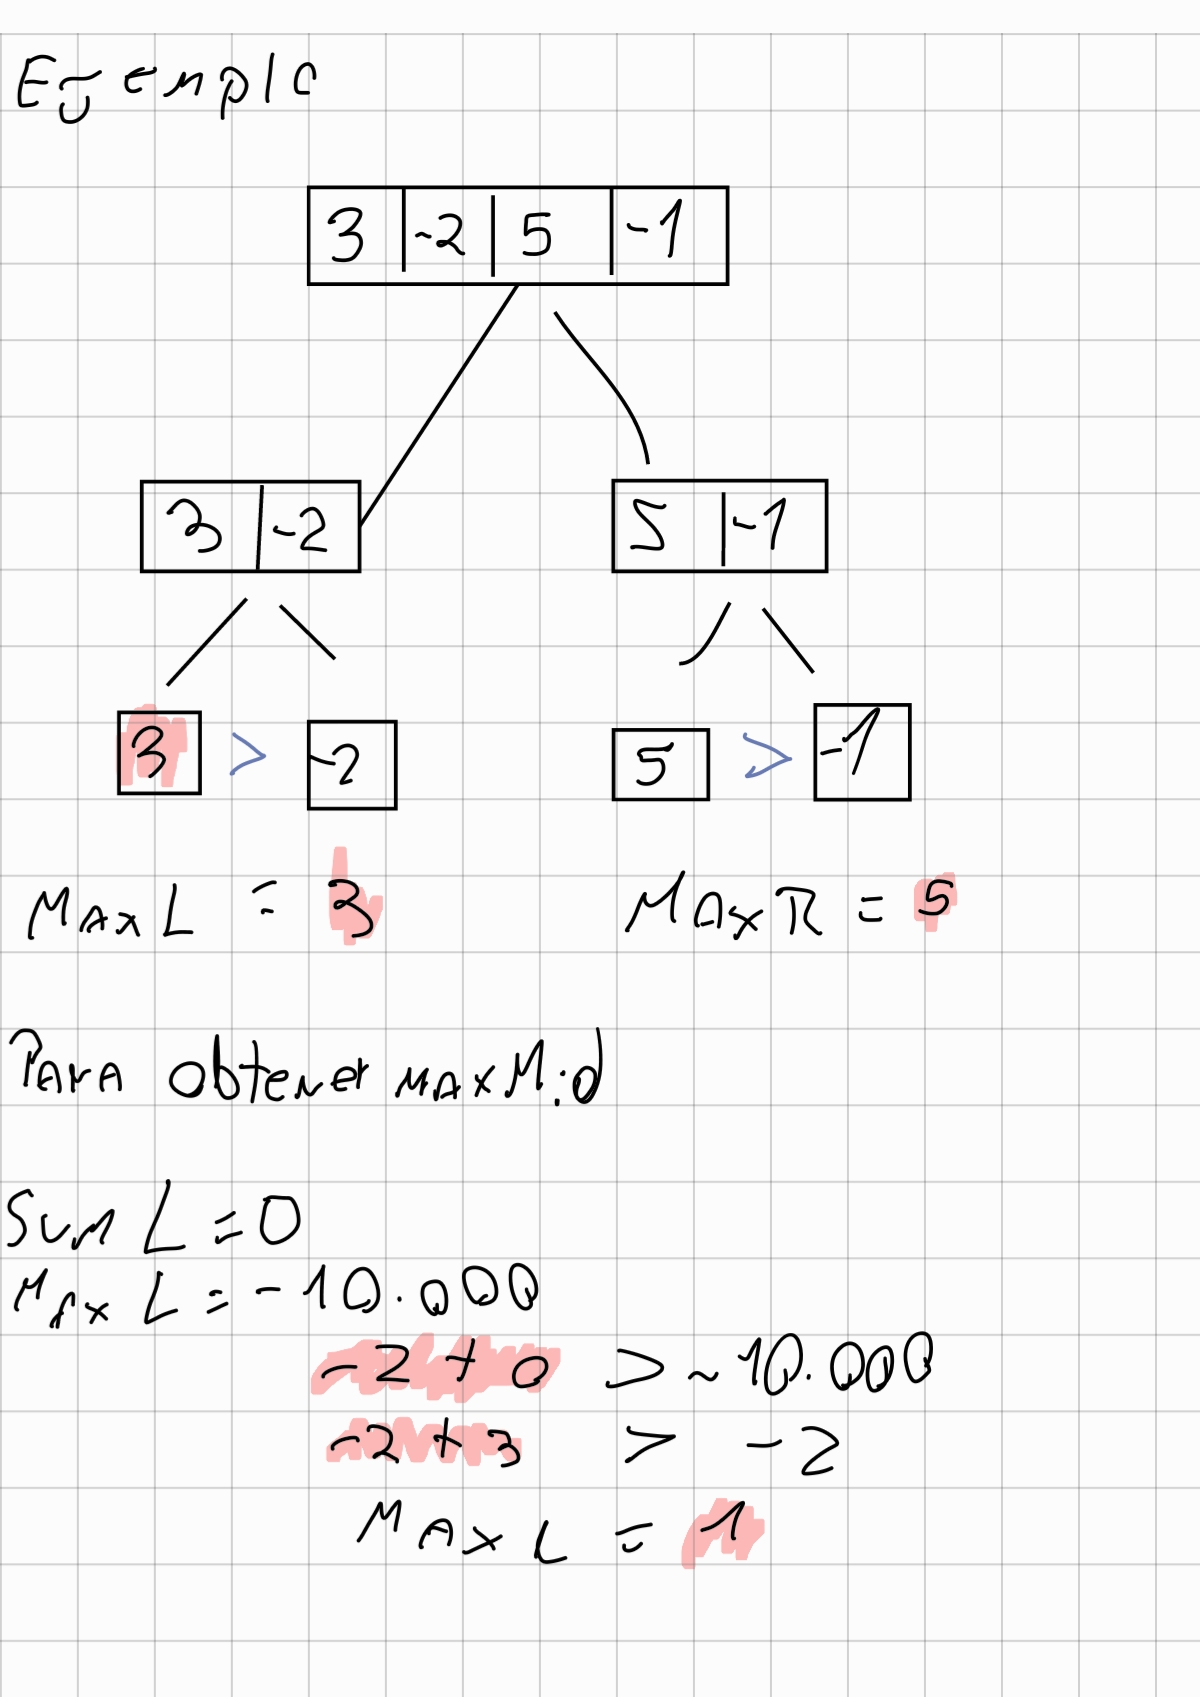

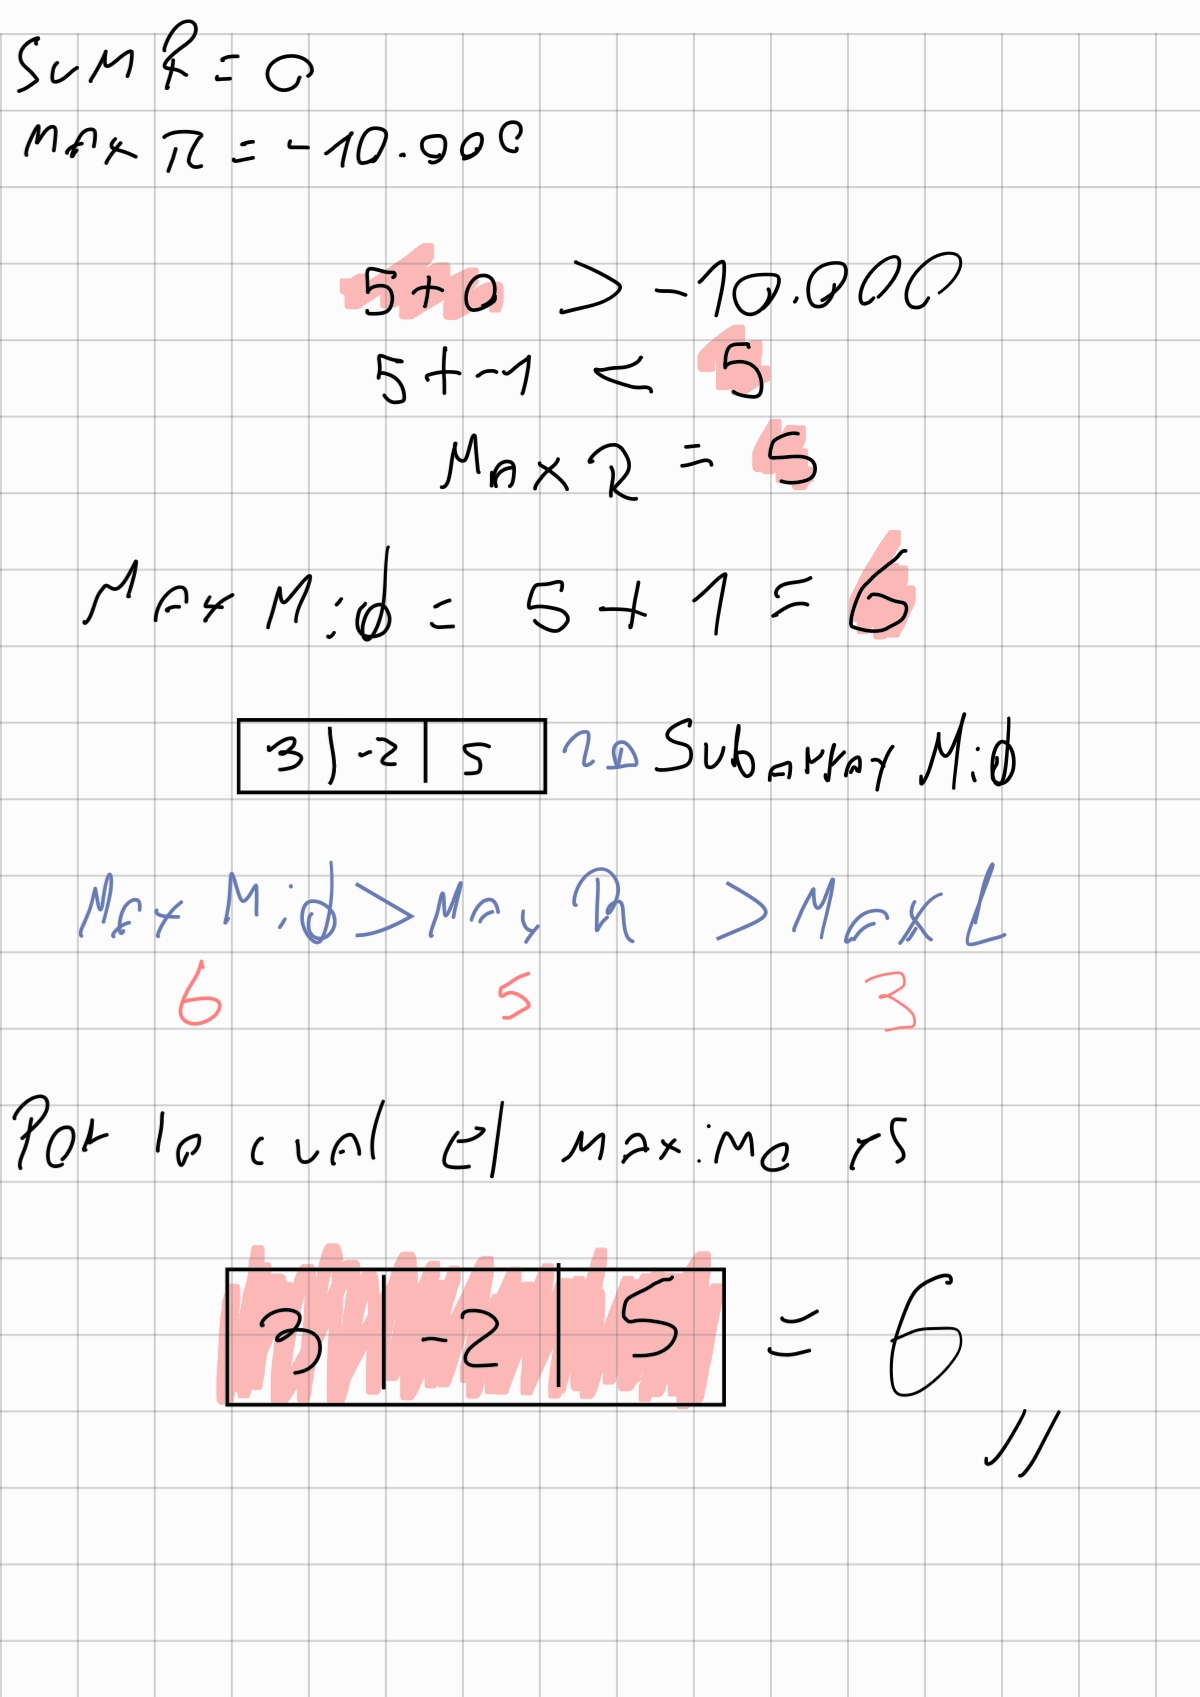

## 2.4. Ejecución del algoritmo paso a paso (`verbose = True`)

Utilizando la opción `verbose = True`, podemos ver lo que ocurre en cada iteración del algoritmo.

In [ ]:
import random
a = random.sample(range(-100, 100), 6)
print("Arreglo de entrada:", colored(f"{str(a[:])[1:-1]}","red"), ",", "\n")

n = len(a)
sum, i, j = maxSubArray(a, 0, n-1, verbose=True)

print("El maximo subarreglo es: ", colored(f"{str(a[i:j+1])[1:-1]}","green"), ",")
print("Comienza en la posición", colored(f"{i}","red"), "y termina en la posición", colored(f"{j}","red"))
print("La suma maxima es:", sum)

Arreglo de entrada: -56, 70, -17, 56, 69, -85 , 

SubArreglo Izquierdo:  [-56, 70, -17]
SubArreglo Derecho:  [56, 69, -85] 

SubArreglo Izquierdo:  [-56]
SubArreglo Derecho:  [70, -17] 

SubArreglo Izquierdo:  [70]
SubArreglo Derecho:  [-17] 

Suma izquierda: 70
Suma derecha: -17
Maximo Subarreglo que pasa por el medio:   , 70, -17 

El subarreglo máximo es el izquierdo: [-17]
Suma izquierda: -56
Suma derecha: 70
Maximo Subarreglo que pasa por el medio:   , -56, 70 

El subarreglo máximo es el izquierdo: []
SubArreglo Izquierdo:  [56]
SubArreglo Derecho:  [69, -85] 

SubArreglo Izquierdo:  [69]
SubArreglo Derecho:  [-85] 

Suma izquierda: 69
Suma derecha: -85
Maximo Subarreglo que pasa por el medio:   , 69, -85 

El subarreglo máximo es el izquierdo: [-85]
Suma izquierda: 56
Suma derecha: 69
Maximo Subarreglo que pasa por el medio:   , 56, 69 

El subarreglo máximo es el central: [56, 69]
Suma izquierda: 53
Suma derecha: 125
Maximo Subarreglo que pasa por el medio:  70, -17 , 56, 69 



#**3. Tiempo de ejecución**

## **Teorema (Tiempo de ejecución).**

El algoritmo **Max SubArray** tiene un **tiempo de ejecución de** $O(n log(n))$ en todos los casos, esto se debe a que independiente del tamaño del problema, este siempre realizará la misma cantidad de operaciones, ya que utiliza el paradigma de *Divide y vencerás*.

### Prueba del teorema **Árbol de recursión**

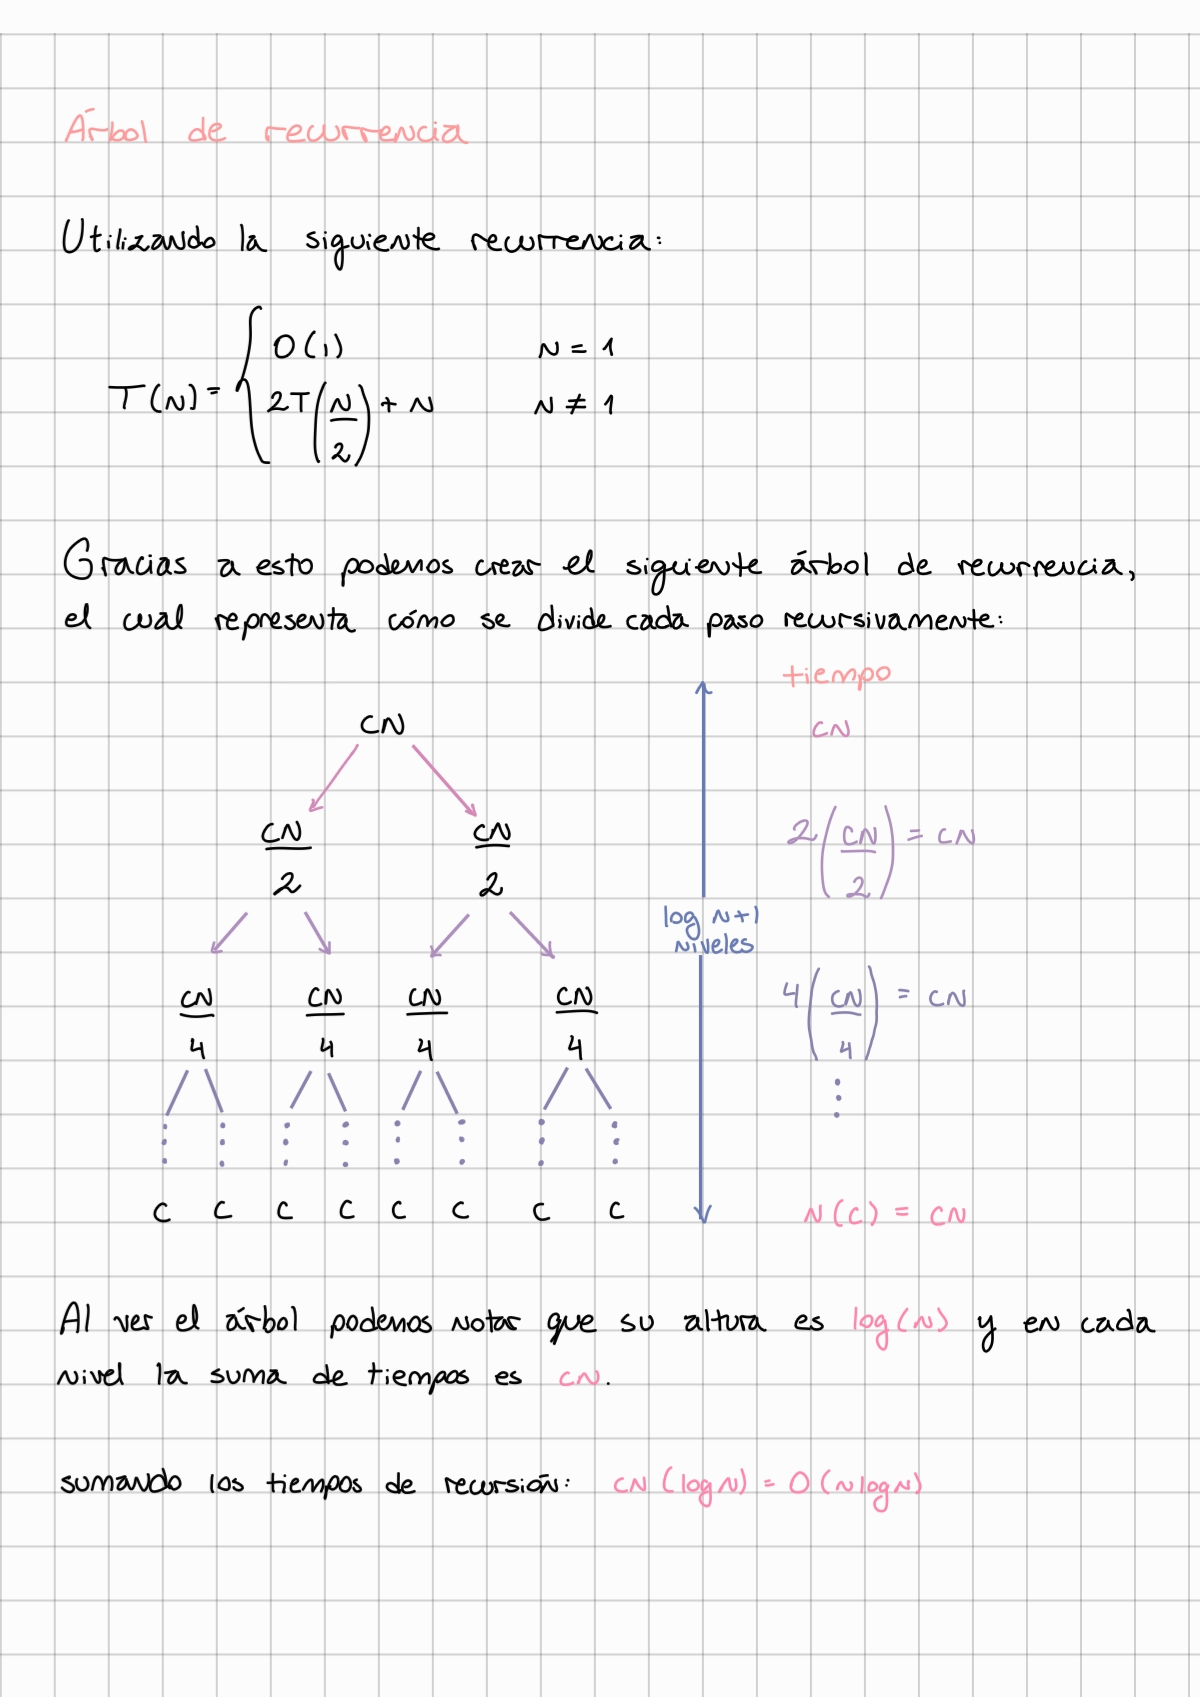

### Prueba del teorema **Inducción Matemática**

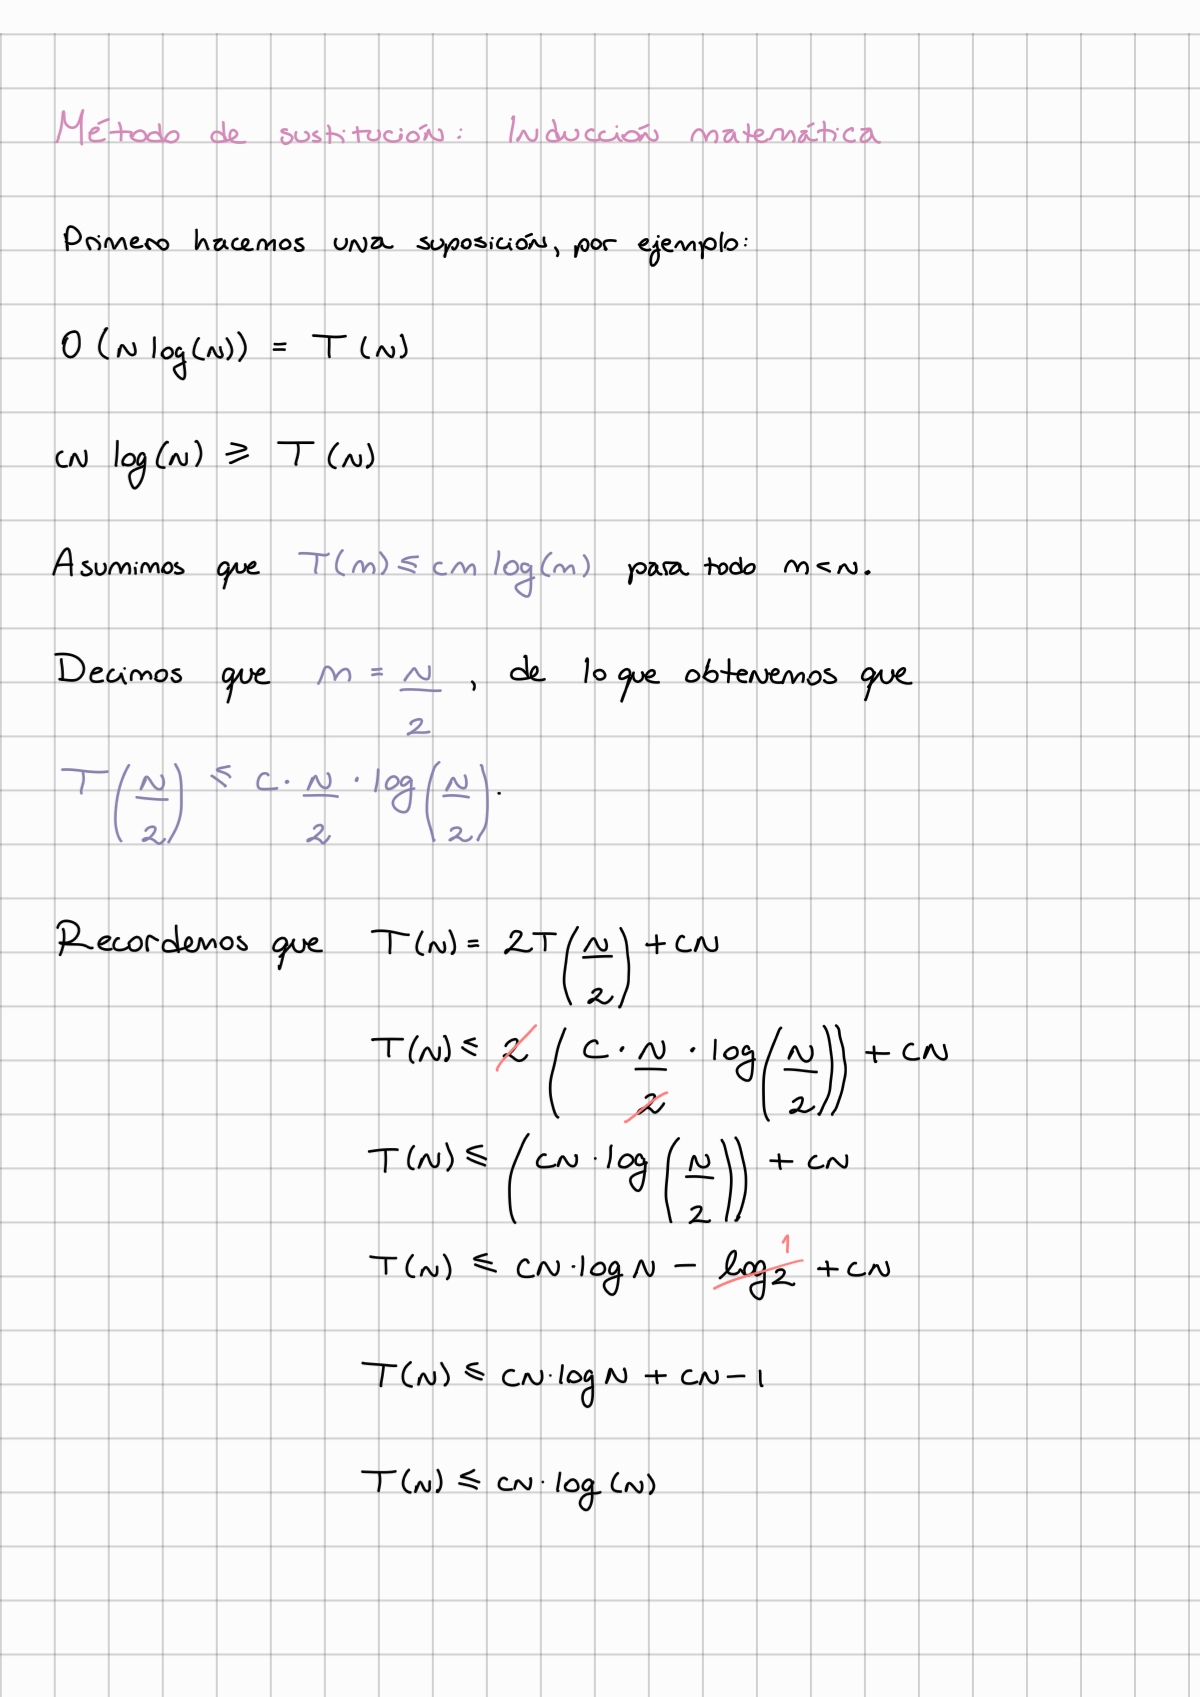

### Prueba del teorema **Metodo Maestro**

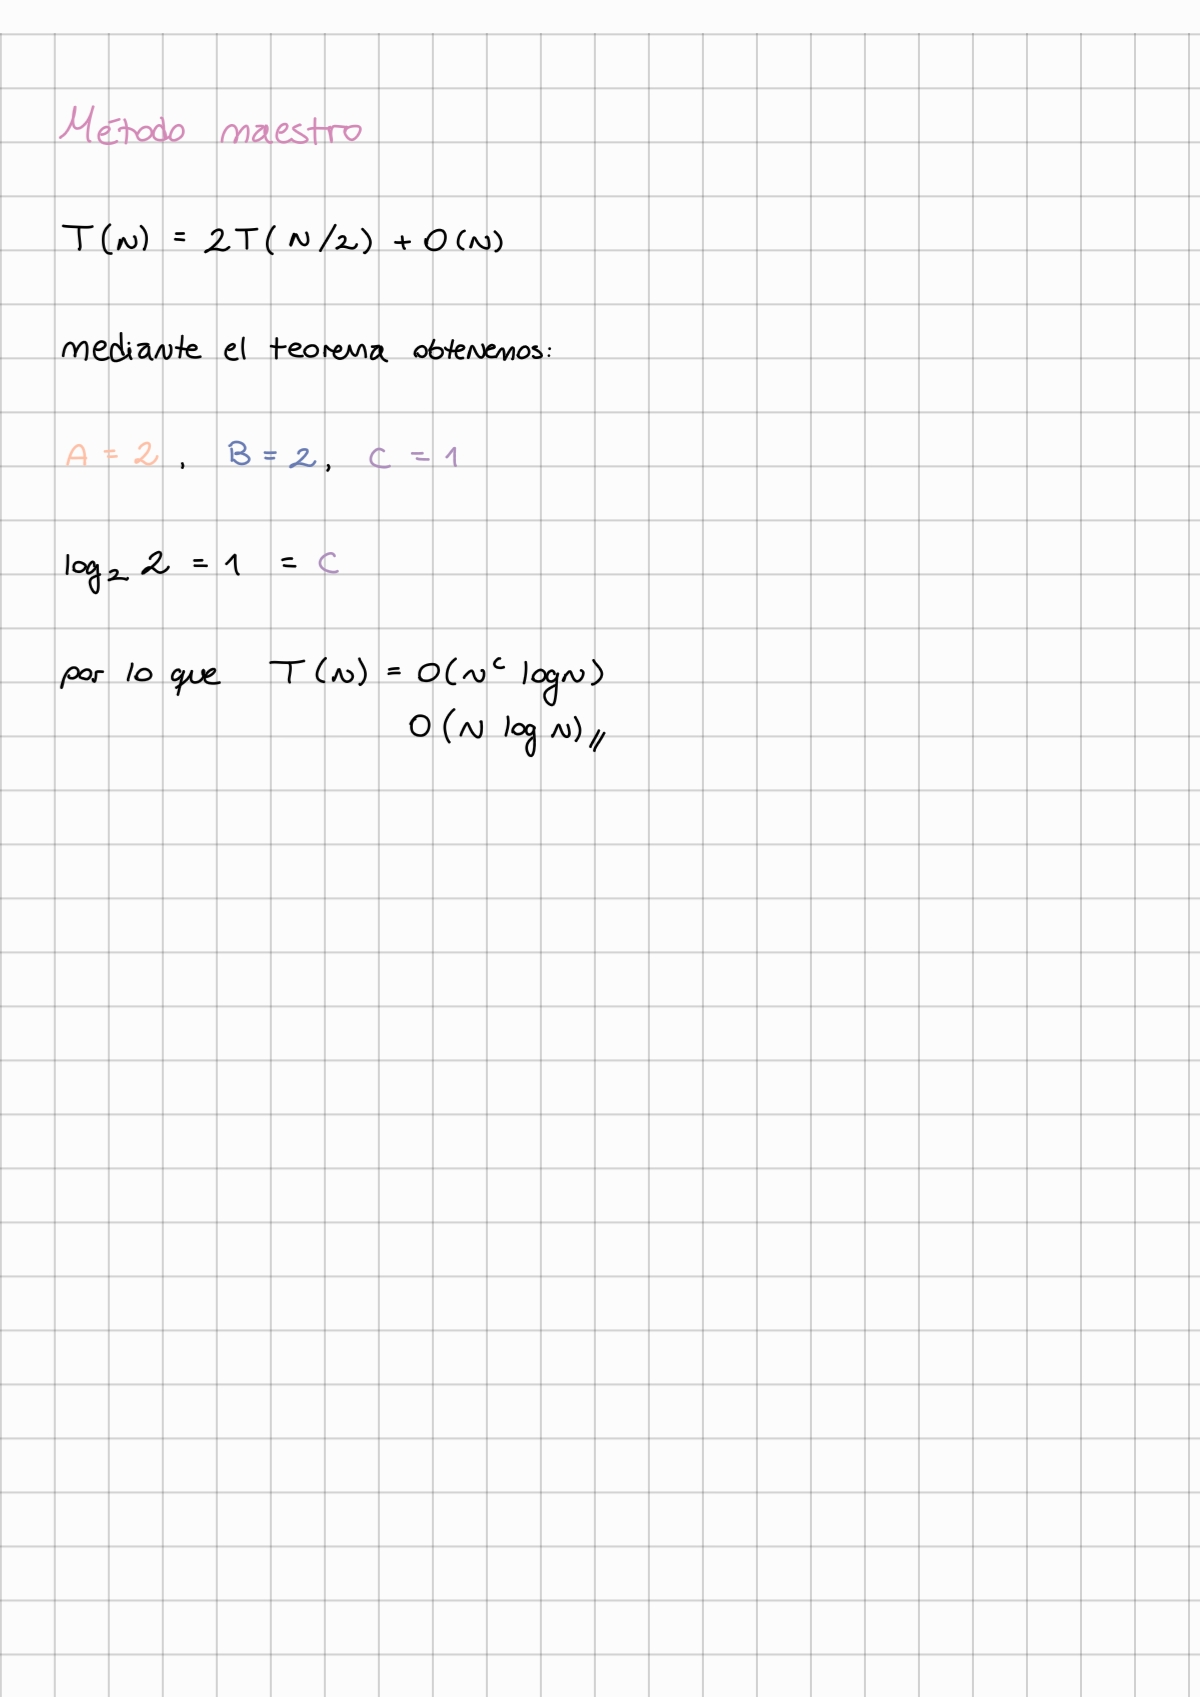

# **4. Correctitud**

##**Teorema (Correctitud).**

El algoritmo **maxSubarray** genera un arreglo de tamaño menor o igual al original, otorgando la suma máxima encontrada en el arreglo.

Para comprobar el teorema utilizaremos la *inducción matemática* (maxSubarray) y la propiedad del *bucle invariante* (maxMidSubarray).











### **Bucle invariante (maxMidSubarray)**





Propiedad invariante de bucle: Para cada iteración, las variables ```maxLeft``` y ```maxRight``` contienen la máxima suma del arreglo hasta la posición i-ésima. 

* **Inicialización**: En un comienzo la variable que contiene la suma máxima es igual al infinito negativo, ya que no hemos recorrido ningún elemento del arreglo. Al momento de comenzar la iteración los indices comienzan desde ```i = mid - 1``` en el subarreglo izquierdo y ```i = mid``` en el derecho. El primer elemento a comparar siempre será mayor, por lo que se le asigna este valor a la suma máxima del sub-arreglo que estemos recorriendo ```maxLeft``` o ```maxRight```

* **Mantención**: Al estar en la iteración i-ésima el valor de la suma máxima siempre será el mayor. Se compara la suma hasta el elemento i-ésimo y si esta es mayor que el valor guardado en la suma máxima se actualiza el valor, de lo contrario se mantiene la suma máxima guardada anteriormente.

* **Finalización**: El bucle termina al recorrer cada sub-arreglo por completo(). Para obtener el arreglo máximo que pasa por el medio se suman los valores de las variables ```(maxSum = maxLeft + maxRight)```, con lo que obtenemos el arreglo con la suma máxima que cruza por el punto de división del arreglo original.

### **Inducción matemática (maxSubarray)**


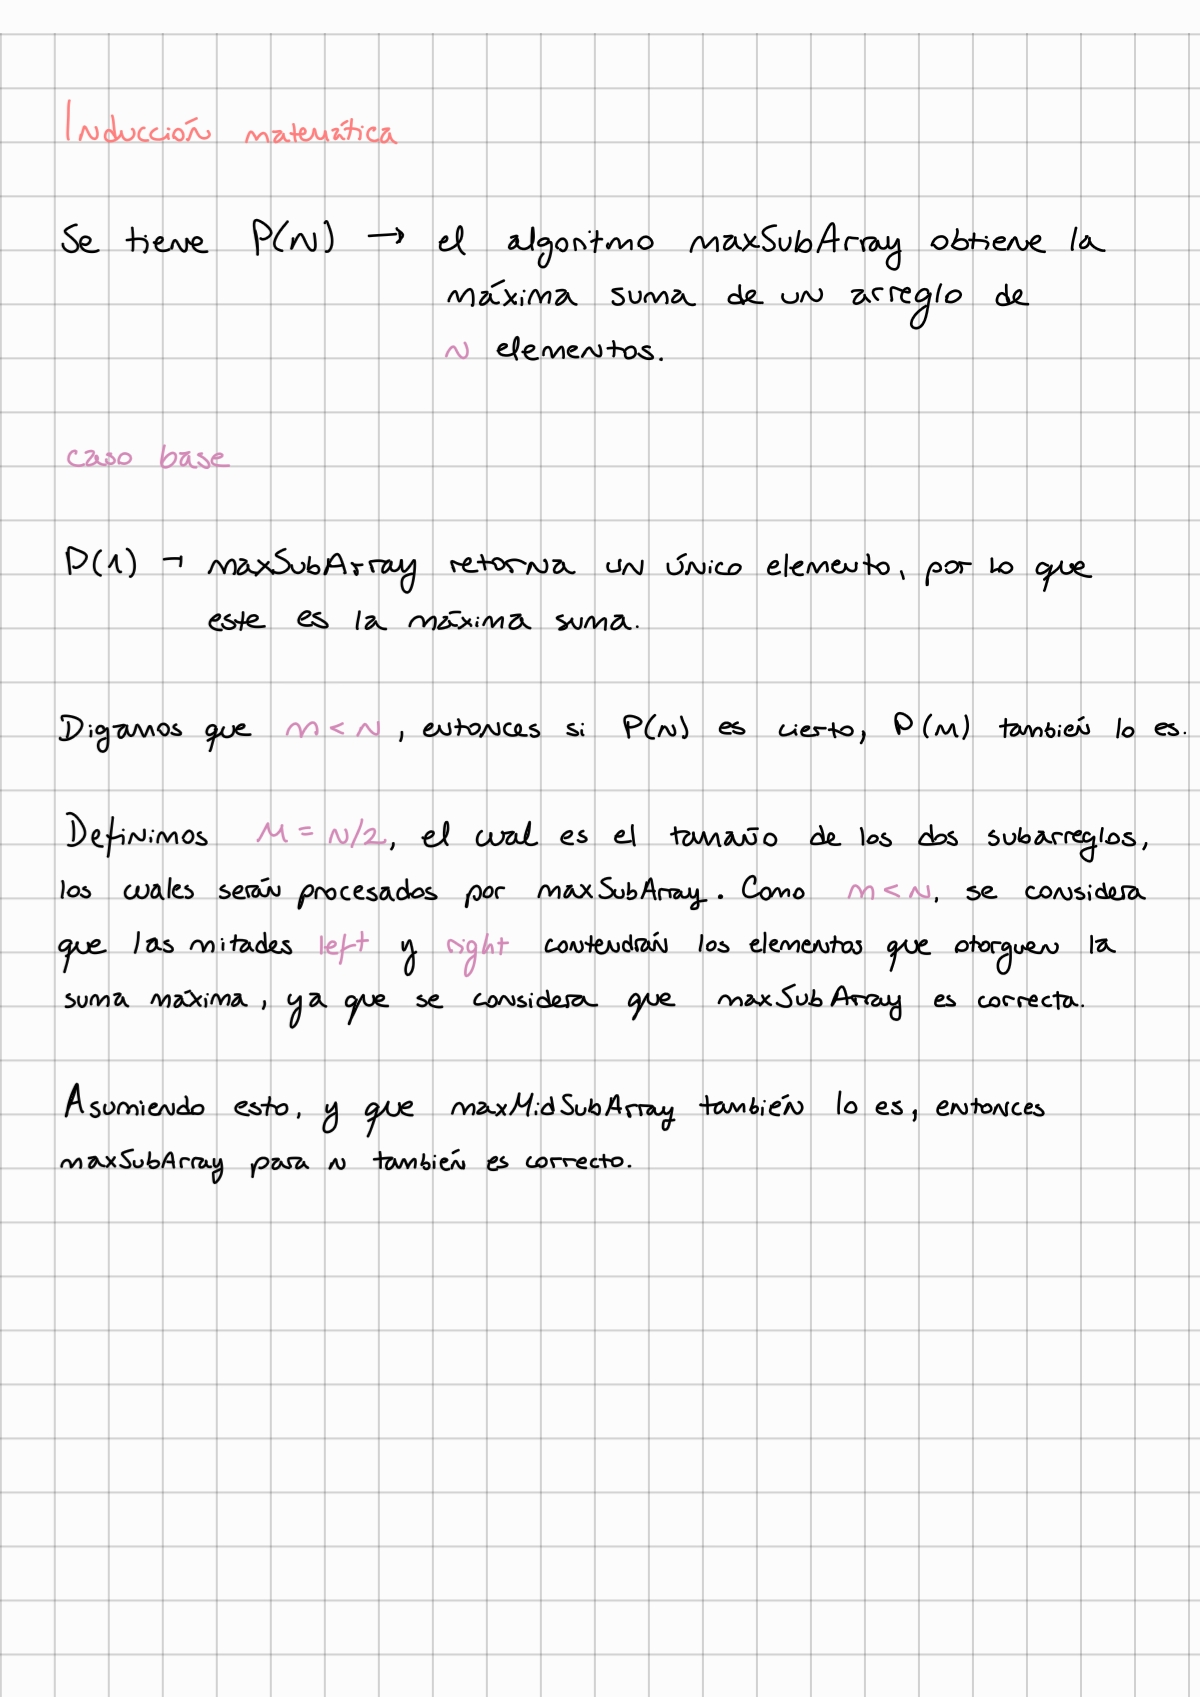

# **5. Experimentos.**

## 5.1. Tiempo de ejecución (Divide y vencerás v/s Kadane's v/s Fuerza Bruta)

En los siguientes gráficos se reporta el tiempo de ejecución del algoritmos
de optimización **MaxSubarray**, comparando tres versiones de este, los cuales son: **Divide y vencerás**, **Kadane's** y **Fuerza Bruta**, en función del tamaño del problema para arreglos generados aleatoriamente de tamaños entre $5$ y $500$. A partir de los gráficos obtenidos se realizará una comparación del rendimiento de ambos algoritmos.

### Comparación tiempo de ejecución **Divide y vencerás v/s Kadane's v/s Fuerza Bruta**

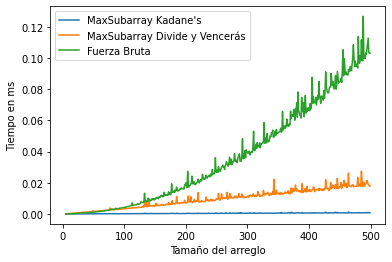

In [ ]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random
import copy

# Algoritmo de fuerza bruta
def max_Summ(a):
    max_sum = 0
    k=0
    for i in a:
        temp_sum = 0
        for j in a[k::]:
            temp_sum=temp_sum+j
            if temp_sum>max_sum:
                max_sum=temp_sum
        k=k+1
    return max_sum

# Algoritmo de kadane
def maxSubArraySum(a,size):
       
    max_so_far = -math.inf
    max_ending_here = 0
       
    for i in range(0, size):
        max_ending_here = max_ending_here + a[i]
        if (max_so_far < max_ending_here):
            max_so_far = max_ending_here
  
        if max_ending_here < 0:
            max_ending_here = 0   
    return max_so_far

x=[]; y=[]
y1=[]
y2=[]

for n in range(5,500):

  a = random.sample(range(1, 1000), n)
  verbose = False
  #la función repeat está ejecutando 20 veces insertion_Sort con el arreglo a y retorna el mejor tiepo obtenido.
  t1 = repeat(setup="from __main__ import maxSubArraySum", stmt=f"maxSubArraySum({a}, {n})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import maxSubArray", stmt=f"maxSubArray({a},{0},{n-1},{verbose})", repeat=1, number=10)
  t3 = repeat(setup="from __main__ import max_Summ", stmt=f"max_Summ({a})", repeat=1, number=10)
  x.append(n)
  y.append(t1)
  y1.append(t2)
  y2.append(t3)


plt.plot(x, y)
plt.plot(x, y1)
plt.plot(x, y2)
plt.legend(["MaxSubarray Kadane's", "MaxSubarray Divide y Vencerás", "Fuerza Bruta"])

plt.xlabel('Tamaño del arreglo')
plt.ylabel('Tiempo en ms')
plt.show()

### Análisis de resultados.

* A primera vista podemos ver que el algoritmo de **Kadane** es el mas efectivo, lo cual se debe a su complejidad lineal $O(n)$, y que ademas este no presenta ningún peak a comparación de los demas que si lo presentan.

* Por otro lado, el algoritmo de **fuerza bruta** es el menos efectivo debido a su complejidad cuadratica $O(n^2)$, el cual realiza una cantidad de comparaciones mucho mayor a los demas. Además, este presenta una gran cantidad de peaks, seguramente se deba a la cantidad de comparaciones que realiza en cada arreglo o al comportamiento impredecible de los procesadores.

* Por último, el algoritmo implementado mediante el paradigma de *divide y vencerás*, a pesar de no ser el mas efectivo de igual manera el tiempo de ejecución ($O(nlogn)$) es mucho menor al de fuerza bruta, el cual supera los 0.12 ms, en cambio este supera apenas los 0.02 ms, todo gracias a la división del problema en sub-problemas.